<a href="https://colab.research.google.com/github/aisyahdnn/Skripsi/blob/master/Dataset8020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#untuk menghubungkan drive ke colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Library python yang dipakai

import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np #linear algebra
import math
import os #library lokasi path

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from skimage import io
from skimage import feature

import matplotlib.pyplot as plt

import cv2

In [2]:
terinfeksi_data = os.listdir('/content/drive/My Drive/Dataset/DATA8020/Terinfeksi')
print(terinfeksi_data)

print('\n')

tidakTerinfeksi_data = os.listdir('/content/drive/My Drive/Dataset/DATA8020/TidakTerinfeksi')
print(tidakTerinfeksi_data)

['C39P4thinF_original_IMG_20150622_111206_cell_102.png', 'C39P4thinF_original_IMG_20150622_111206_cell_100.png', 'C39P4thinF_original_IMG_20150622_111206_cell_111.png', 'C39P4thinF_original_IMG_20150622_111206_cell_79.png', 'C39P4thinF_original_IMG_20150622_111206_cell_105.png', 'C39P4thinF_original_IMG_20150622_111206_cell_87.png', 'C39P4thinF_original_IMG_20150622_111206_cell_108.png', 'C39P4thinF_original_IMG_20150622_111206_cell_86.png', 'C39P4thinF_original_IMG_20150622_111206_cell_81.png', 'C39P4thinF_original_IMG_20150622_111206_cell_107.png', 'C39P4thinF_original_IMG_20150622_111206_cell_99.png', 'C39P4thinF_original_IMG_20150622_111206_cell_106.png', 'C39P4thinF_original_IMG_20150622_111206_cell_104.png', 'C39P4thinF_original_IMG_20150622_111206_cell_85.png', 'C39P4thinF_original_IMG_20150622_111206_cell_112.png', 'C39P4thinF_original_IMG_20150622_111206_cell_83.png', 'C39P4thinF_original_IMG_20150622_111206_cell_109.png', 'C39P4thinF_original_IMG_20150622_111326_cell_3.png', 

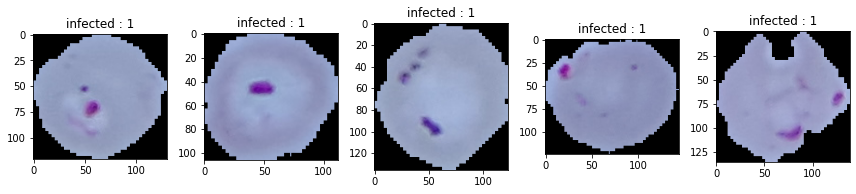

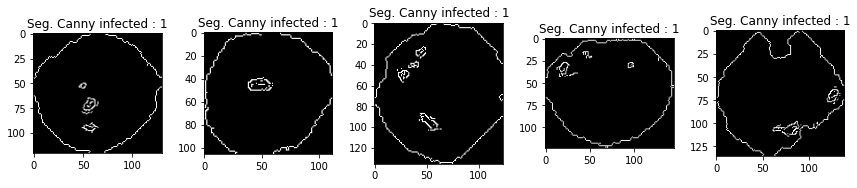

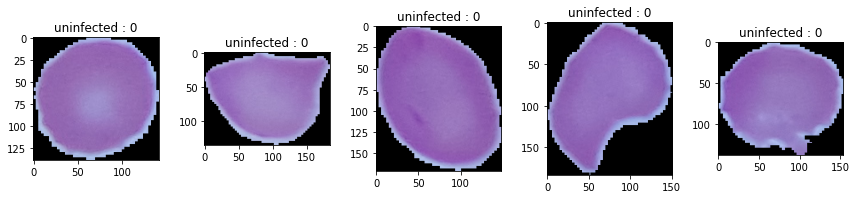

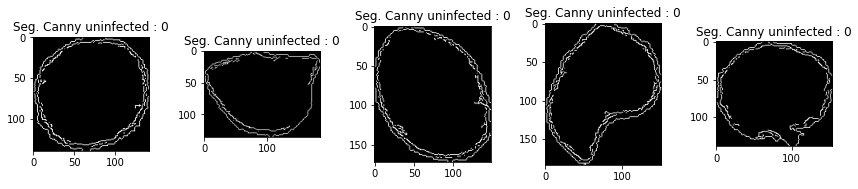

In [3]:
#Tahap Visualisasi Citra Malaria Terinfeksi

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA8020/Terinfeksi' + "/" + terinfeksi_data[i])
    plt.imshow(img,cmap='gray')
    plt.title('infected : 1')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA8020/Terinfeksi' + "/" + terinfeksi_data[i])
    edges = cv2.Canny(img,25,100)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Canny infected : 1')
    plt.tight_layout()


#Tahap Visualisasi Citra Malaria Tidak Terinfeksi

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA8020/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    plt.imshow(img,cmap='gray')
    plt.title('uninfected : 0')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA8020/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    edges = cv2.Canny(img,25,100)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Canny uninfected : 0')
    plt.tight_layout()
plt.show()

In [0]:
#SEGMENTASI CANNY DAN EKSTRAKSI HUMOMENT

x = np.array([['H1','H2','H3','H4','H5','H6','H7','Target']])

#Proses Citra Malaria Terinfeksi
for i in range(len(terinfeksi_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA8020/Terinfeksi' + "/" + terinfeksi_data[i])
    edges = cv2.Canny(img,25,100)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,1)
    x = np.vstack((x,a))

#Proses Citra Malaria TidakTerinfeksi
for i in range(len(tidakTerinfeksi_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA8020/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    edges = cv2.Canny(img,25,100)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,0)
    x = np.vstack((x,a))

In [0]:
#EXPORT to CSV
np.savetxt("/content/drive/My Drive/Dataset/DatasetMalaria8020.csv", x, fmt='%s',delimiter=',' )

In [9]:
#LOAD CSV DATASET

dataset = pd.read_csv('/content/drive/My Drive/Dataset/DatasetMalaria8020.csv')
print (len(dataset))
print (dataset)

1000
           H1            H2            H3  ...            H6            H7  Target
0    0.022486  2.170606e-06  5.251706e-08  ...  1.880536e-10  2.100899e-14     1.0
1    0.024971  8.086240e-06  5.512390e-08  ...  1.585229e-10  6.472787e-15     1.0
2    0.020768  1.963788e-05  3.419344e-07  ... -2.182370e-09 -1.943498e-14     1.0
3    0.026068  1.106969e-05  3.330971e-07  ...  2.409185e-10  1.857375e-13     1.0
4    0.021088  2.154903e-07  6.753852e-08  ... -7.581914e-11  5.605419e-14     1.0
..        ...           ...           ...  ...           ...           ...     ...
995  0.044689  2.038865e-05  4.988108e-08  ... -6.784757e-10  1.208591e-14     0.0
996  0.037009  2.898748e-06  2.238312e-06  ...  3.582379e-11  1.729377e-14     0.0
997  0.041283  1.063268e-05  9.545901e-08  ...  2.082204e-11  1.452567e-14     0.0
998  0.033703  6.891644e-05  9.506536e-07  ...  6.796116e-09 -5.453054e-13     0.0
999  0.041892  1.739538e-05  1.276944e-08  ...  3.094483e-10 -1.394374e-15     0.0

In [0]:
#replace NaN
zero_not_accepted = [ 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7' ]

for colum in zero_not_accepted:
   # dataset [colum] = dataset[colum].replace(0, np.NaN)
    mean = int(dataset[colum].mean(skipna=True))
    dataset[colum] = dataset[colum].replace(np.NaN, mean)

In [11]:
#split target and attribute
x = dataset.iloc[:, 1:7]
y = dataset.iloc[:, 7]
#split train n test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.1)
print(len(y_test))
print(len(x_train))
print(len(dataset))
y

100
900
1000


0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
995    0.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: Target, Length: 1000, dtype: float64

Text(0.5, 1.0, 'testing')

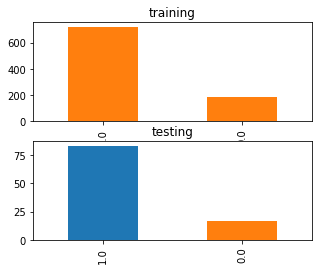

In [12]:
x_train
x_test
y_train
len(y_test)

plt.figure(figsize=(5,4))
plt.subplot(2,1,1);y_train.value_counts().plot(kind='bar', color=['C1','C1','C2','C3','C4','C5','C6']);plt.title('training')
plt.subplot(2,1,2);y_test.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('testing')

In [13]:
#scaling data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
x_train

array([[ 0.16945549, -0.53196796,  0.1435971 , -0.03661533,  0.26847995,
        -0.13856154],
       [-0.33586499, -0.17229171,  0.26636704,  0.17789883,  0.11151796,
         0.23196103],
       [-0.39299882,  1.29442739,  0.77564802, -1.16502307,  0.2046473 ,
        -0.34975744],
       ...,
       [ 0.19980893, -0.49843321,  0.18581351,  0.15369587,  0.38706045,
        -0.03277661],
       [-0.63009025, -0.55457208, -0.75258272,  0.01641363, -0.37569111,
        -0.05102659],
       [-0.62922967, -0.52289201, -0.27067759,  0.05248363, -0.45405183,
        -0.01748108]])

In [14]:
math.sqrt(len(y_test))

10.0

In [15]:
#choose method and fitting
classifier = KNeighborsClassifier(n_neighbors=3,p=2,metric='euclidean')
classifier.fit (x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [16]:
#testing fsts
y_pred = classifier.predict(x_test)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [17]:
#print result
cm = confusion_matrix(y_test, y_pred)
print (cm)
print("Akurasi :" , accuracy_score(y_test, y_pred))
print("presisi :" , precision_score(y_test, y_pred, average=None))
print("recall :" , recall_score(y_test, y_pred, average=None))
print("F-Measure :" , f1_score(y_test, y_pred, average=None))

[[ 1 16]
 [ 8 75]]
Akurasi : 0.76
presisi : [0.11111111 0.82417582]
recall : [0.05882353 0.90361446]
F-Measure : [0.07692308 0.86206897]


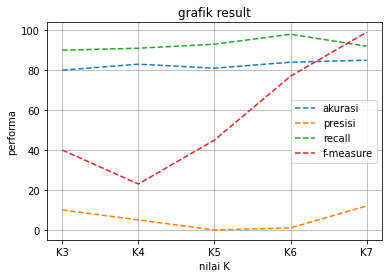

In [18]:
from matplotlib import pyplot as plt
x = ["K3", "K4", "K5", "K6", "K7"]
a = [80, 83, 81, 84, 85]
p = [10, 5, 0, 1, 12]
r = [90, 91, 93, 98, 92]
f = [40, 23, 45, 77, 99]
plt.plot(x, a, '--')
plt.plot(x, p, '--')
plt.plot(x, r, '--')
plt.plot(x, f, '--')
plt.title("grafik result")
plt.xlabel("nilai K")
plt.ylabel("performa")
plt.legend(["akurasi", "presisi", "recall", "f-measure"])
plt.grid()
plt.show()